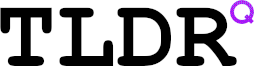

In the TLDR (Too Long; didn't read) notebooks, I don't try to do any fancy feature engineering, data cleaning, n-fold validation, or similar time consuming techniques. I simply solve the problem in six staightforward steps:

1. Load the data
2. Split in train and test sets
3. Determine in input features are categorical or continuous
4. Create a QLattice
5. Use QLattice to find the simplest possible model
6. Evaluate the model (with AUC for classification and $R^2$ for regression)


In [ ]:
!pip install feyn

In [ ]:
import pandas as pd
import feyn

# 1. Load the data

In [ ]:
df = pd.read_csv("/kaggle/input/predict-the-churn-risk-rate/churn.csv")
df = df.drop(["Unnamed: 0","security_no","joining_date","referral_id"], axis=1)
df = df.dropna()

# 2. Split the data

In [ ]:
train, test = feyn.tools.split(df, ratio=(1,1), random_state=42)

# 3. Identify categorical features

In [ ]:
stypes = {name: "cat" for name in df if df[name].dtype=="object"}

# 4. Create a QLattice

In [ ]:
ql = feyn.QLattice(random_seed=42)

# 5. Find the model

In [ ]:
models = ql.auto_run(train, kind="classification", output_name="churn_risk_score", stypes=stypes, n_epochs=5)

# 6. Evaluate

In [ ]:
models[0].plot(train,test)

Pretty good accuracy from this simple approach. The QLattice really shows its power in dealing with categorical features

# THE END